## Analisis del comportamiento de los clientes en la industria del Retail.


Apliacion de machine learning mediante las reglas de asociacion

## importancia del Análisis de la cesta de compras (Market Basket Analysis)

El Análisis de la Cesta de Compras, o Market Basket Analysis (MBA), es una técnica poderosa utilizada en el mundo del análisis de datos y la minería de datos. Su objetivo principal es descubrir patrones de asociación entre los productos que los clientes compran juntos con mayor frecuencia.

## Beneficios

<li>Optimización del diseño de la tienda.
<li>Recomendaciones personalizadas.
<li>Desarrollo de promociones efectivas.
<li>Gestión del inventario.
<li>Mejora de la experiencia del cliente.


## Caso practico

Objetivo<br>
<li>Desarrollar un modelo que nos permita explorar la relacion entre los distintos productos para poder realizar recomendaciones en un negocio minorista

In [1]:
import pandas as pd

# Modifico las opciones de pandas para visualizar todas las columnas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Oculto las alertas
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

# Aunque la línea warnings.filterwarnings("ignore") anterior ya cubre estos casos, es buena práctica ser explícito si solo quieres ignorar ciertas advertencias.

In [2]:
!pip install openpyxl

In [3]:
import pandas as pd

# Especificamos el motor 'openpyxl' para archivos .xlsx
data = pd.read_excel('https://docs.google.com/spreadsheets/d/1lj7lKMVuA3MbKd9j9pj3zzFs-EkX6FJH/export?format=xlsx', sheet_name='Year 2010-2011', engine='openpyxl')

In [4]:
#data = pd.read_excel('https://docs.google.com/spreadsheets/d/1lj7lKMVuA3MbKd9j9pj3zzFs-EkX6FJH/edit?usp=sharing&ouid=112355069117586008961&rtpof=true&sd=true', sheet_name=('Year 2010-2011'))

In [5]:
data.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
294572,562715,22357,KINGS CHOICE BISCUIT TIN,1,2011-08-08 15:34:00,4.13,NaN,United Kingdom
173343,551693,23004,TRAVEL CARD WALLET PANTRY,24,2011-05-03 13:36:00,0.42,15582.0,United Kingdom
493316,578225,23191,BUNDLE OF 3 RETRO NOTE BOOKS,12,2011-11-23 11:51:00,1.65,17700.0,United Kingdom
94666,544406,22966,GINGERBREAD MAN COOKIE CUTTER,3,2011-02-18 13:26:00,1.25,16726.0,United Kingdom
347654,567328,23157,SET OF 6 NATIVITY MAGNETS,12,2011-09-19 14:43:00,2.08,14356.0,United Kingdom


Revision de los datos


In [6]:
# Exploramos las dimensiones del DataFrame
print(f'Numero de filas:{data.shape[0]}')
print(f'Numero de columnas:{data.shape[1]}')

Numero de filas:541910
Numero de columnas:8


In [7]:
#Revisamos la informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#revision datos estadisticos del DataFrame
data.describe().round(2).transpose()

,count,mean,min,25%,50%,75%,max,std
Quantity,541910.0,9.55,-80995.0,1.0,3.0,10.0,80995.0,218.08
InvoiceDate,541910,2011-07-04 13:35:22.342307584,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
Price,541910.0,4.61,-11062.06,1.25,2.08,4.13,38970.0,96.76
Customer ID,406830.0,15287.68,12346.0,13953.0,15152.0,16791.0,18287.0,1713.6


Exploracion de atributos:exploracion de variables categoricas y numericas

In [9]:
data.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [10]:
#explotramos variables categoricas
var_categoricas = data.select_dtypes(include='object')

print(f'variables categoricas: {var_categoricas.shape[1]}')
print(f'Numero de las variables categoricas: {var_categoricas.columns}')

variables categoricas: 4
Numero de las variables categoricas: Index(['Invoice', 'StockCode', 'Description', 'Country'], dtype='object')


In [11]:
#Exploramos variables numericas
var_numericas = data.select_dtypes(exclude='object')

print(f'variables numericas: {var_numericas.shape[1]}')
print(f'Numero de las variables numericas: {var_numericas.columns}')

variables numericas: 4
Numero de las variables numericas: Index(['Quantity', 'InvoiceDate', 'Price', 'Customer ID'], dtype='object')


Manejo de variables

In [12]:
df= data.copy()

In [13]:
#Revison de valores nulos
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [14]:
#Eliminacion de valores nulos
df.dropna(inplace=True)

In [15]:
#Eliminacion de columnas no necesarias para el estudio
df = df.drop(['InvoiceDate'], axis=1)

In [16]:
#Valoracion de las dimensiones del Dataframe nuevamente
print(f'filas:{df.shape[0]}')
print(f'Columnas:{df.shape[1]}')

filas:406830
Columnas:7


Visualizacion de datos -EDA


Se realiza un analisis exploratorio de nuestros datos para entenrde merjor nuestra basae de datso, la relacion entre las variables resusumir sus principales caracteristicas para manipular los origenes de los datos y asi obtener las respuestas que buscamos.

In [17]:
# importacion de librerias autilizar
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#conversion de la variable customer Id a entero
df['Customer ID'] = df['Customer ID'].astype(int)

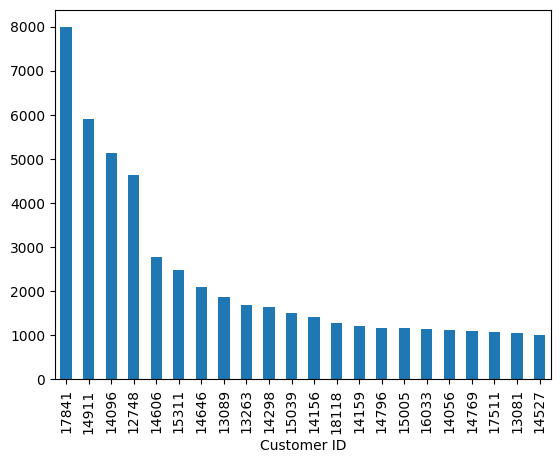

In [19]:
#visualizacion de los Id de los clientes que mas compraron
cliente = df['Customer ID'].value_counts().head(22).plot.bar()

<Axes: ylabel='Description'>

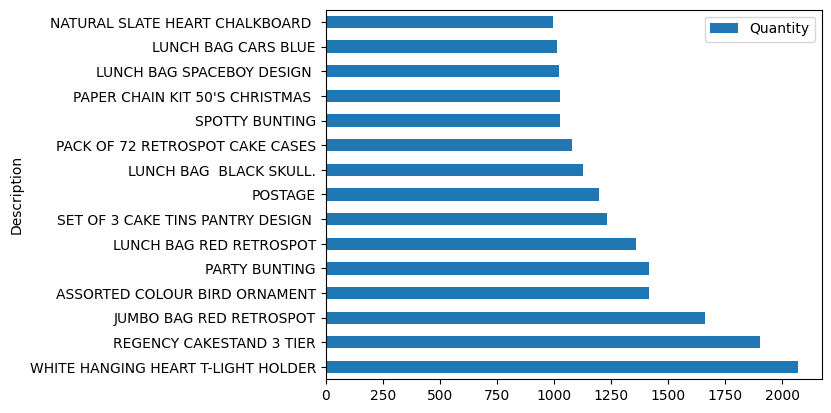

In [20]:
#Se agrupan los items por la cantidad comprada
grupo =df.groupby('Description').count()[['Quantity']]
grupo_ordenado = grupo.sort_values(by='Quantity', ascending= False)

#graficamos los items mas vendidos
grupo_ordenado.head(15).plot.barh()

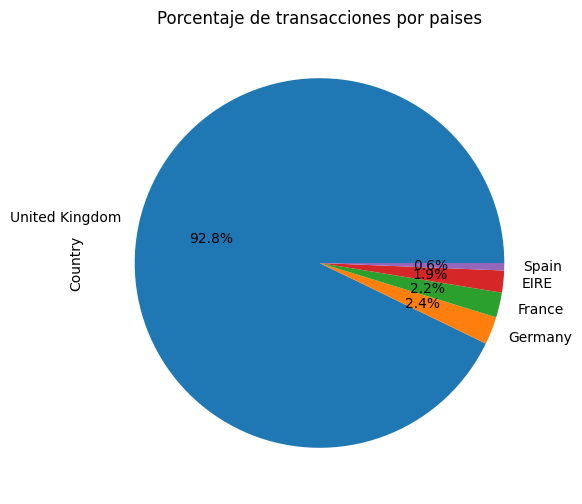

In [21]:

country = df['Country'].value_counts().head()

country.plot.pie(figsize=(12, 6), autopct='%0.1f%%')
plt.title('Porcentaje de transacciones por paises')
plt.ylabel('Country')
plt.show()

Podemos observar que mas del 90% de las compras pertenecen a clientes del reino unido, seguidos por alemania, francia, EIRE y españa

In [22]:
#creamos una funcion para explorara las variables cuantitativas
def explorarVariableNumber(pDatos, pAtributo):
    plt.figure(figsize=(20,4))

     # Filtra i dati tra 0 e 10
    datos_filtrados = pDatos[pAtributo][(pDatos[pAtributo] >= 0) & (pDatos[pAtributo] <= 10)]

    plt.subplot(131)
    plt.hist(datos_filtrados, bins=40, alpha=0.75, facecolor='purple')
    plt.title("Histograma de: " + pAtributo)
    plt.ylabel('Frecuencia')
    plt.xlabel(pAtributo)

    plt.subplot(132)
    plt.boxplot(pDatos[pAtributo])
    plt.title("boxplot de: " + pAtributo + "(0-10)")
    plt.xlabel(pAtributo)
    plt.ylabel("Valor")
    plt.show()


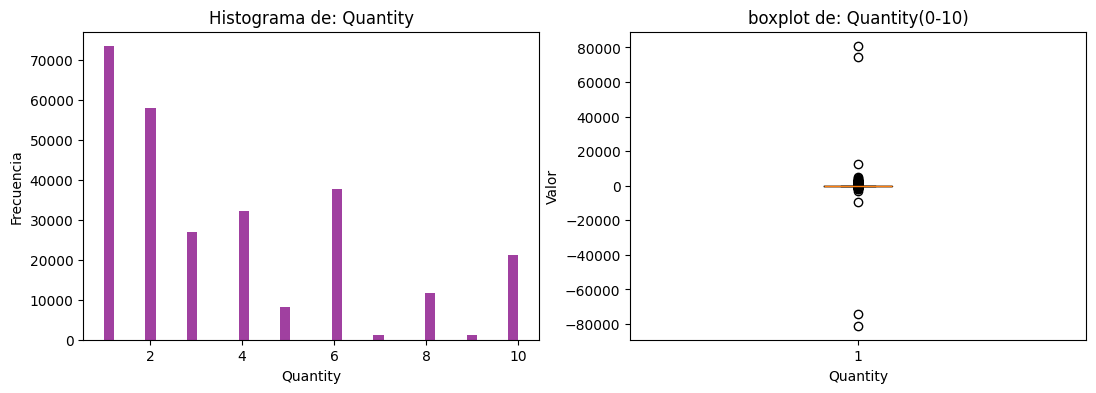

In [23]:
#Exploramos la variable Quantity
explorarVariableNumber(df, 'Quantity')

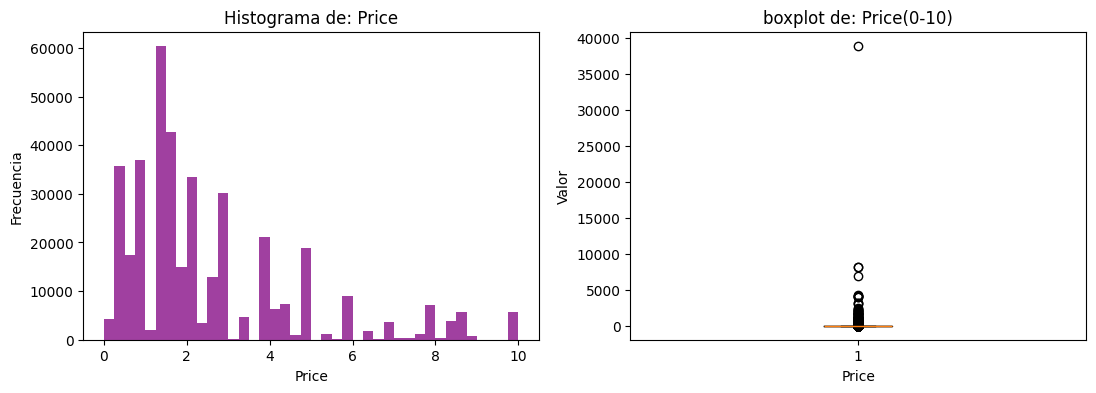

In [24]:
#Exploracion variable Price
explorarVariableNumber(df, 'Price')

*podemos apreciar en los graficos de histograma de las variables cuantitativas que la distribucion es de tipo derecha sesgada y esta sesgfado positivamente ya que tienen valores positivos del lado izquiero y pocos en el valor superiror.

*En los graficos de cajas y bigotes podemos apreciar de igual manera una distribucion asimetrica con alta frecuencia de valores atipicos

Fase preparacion de los datos

Eliminacion de datos no necesarios

In [25]:
#Eliminacion de las transacciones canceladas (son las de la letra "c")
trans_cancelados = pd.DataFrame({'invoice': [row for row in df["Invoice"].values if "c" not in str(row)]})

In [26]:
#eliminamos valores duplicados
trans_cancelados = trans_cancelados.drop_duplicates('invoice')

In [27]:
#reemplazamos la columna invoice del df original con la columna limpia
df['Invoice'] = df['Invoice'].astype(str)
trans_cancelados['invoice'] = trans_cancelados['invoice'].astype(str)

In [28]:
#valoramos las dimensiones del dataframe
df.shape

(406830, 7)

Manejo de outliers

Manejamos los outliers por medio del metodo de rango intercuantilico


In [29]:
import numpy as np

def eliminar_atipicos(atributo):

    #calculo de cuartiles

    Q1=np.percentile(df[atributo], 25)
    Q3=np.percentile(df[atributo], 75)

    #calculo de la distancia entre cuartiles
    IQR= Q3 - Q1

    #Calculo del valor maximo
    maximo = Q3 + 1.5 * IQR

    #calculo del valor minimo
    minimo = Q1 - 1.5 * IQR

    #Atributo
    print('atributo: ' + atributo)

    #Consulta del valor maximo tolerable
    print('valor maximo aceptado ' + str(maximo))

    #Consulta del valor minimo tolerable
    print('valor maximo aceptado ' + str(minimo))

    #filtro del df para eliminar los valores que sobrepasan el Maximo
    return (df[(df[atributo]<maximo) & (df[atributo]>minimo)])
    print("")
    print("Nuevas Dimensiones del Dataframe: " + str(df.shape))

In [30]:
#Eliminacion de valores aytipicos Quantity
df = eliminar_atipicos('Quantity')
print(df.shape)

atributo: Quantity
valor maximo aceptado 27.0
valor maximo aceptado -13.0
(380085, 7)


In [31]:
#Eliminacion bvalores atipicos price
df = eliminar_atipicos('Price')
print(df.shape)

atributo: Price
valor maximo aceptado 7.5
valor maximo aceptado -2.5
(343712, 7)


Manejando los datos duplicados

Necesitamos que la cantidad de productos coincida con la cantidad de idientidicadores del producto por lo que procedemos a eliminar los duplicados

Procedemos a verificar que la cantidad de productos coincidan con la contidad de numeros de producto.

In [32]:
# valorando los valores unicos de la variable description
df['Description'].nunique()

3580

In [33]:
# Valorando los vaolres unicos de la variable stockcode
df['StockCode'].nunique()

3397

Eliminacion valores duplicados en StockCode

In [34]:
#creamos una variable que contenga ambas variables a eliminar duplicados
duplicados = df[['Description', 'StockCode']].drop_duplicates()

#Contamos la cantidad de valores de la variable StocKode
duplicados = duplicados.groupby('Description').count()['StockCode']

#reseteamos el indice
duplicados = duplicados.reset_index()

#oredenamos los valores de forma descendente
duplicados.sort_values(by=('StockCode'), ascending=False).head()

,Description,StockCode
1858,"METAL SIGN,CUPCAKE SINGLE HOOK",3
1237,FROSTED WHITE BASE,2
2584,RETRO PLASTIC 70'S TRAY,2
3395,WHITE BAMBOO RIBS LAMPSHADE,2
3082,SQUARE CHERRY BLOSSOM CABINET,2


In [35]:
#renombrar la columna StockCode
duplicados.rename(columns={'StockCode':'StockCode_count'}, inplace=True)

In [36]:
#Filtramos los valores en donde hay mas de un numero de producto
duplicados = duplicados[duplicados['StockCode_count'] > 1]

In [37]:
#eliminamos los productos con mas de un numero de producto
df = df[~df['Description'].isin(duplicados['Description'])]

In [38]:
#valoramos nuevamente los valores unicos
print(df['Description'].nunique())
print(df['StockCode'].nunique())

3561
3362


Eliminamos los valores duplicados en Description

In [39]:
#creamos una variable que contenga ambas variables a eliminar duplicados
duplicados = df[['Description', 'StockCode']].drop_duplicates()

#contamos la cantiad de valores de la variable stockode
duplicados = duplicados.groupby('StockCode').count()[['Description']]

#Reseteamos el indice
duplicados=duplicados.reset_index()

#ordenamos los valores de forma descendente
duplicados.sort_values(by=('Description'), ascending=False).head()

,StockCode,Description
1865,23236,4
1825,23196,4
1997,23396,3
1759,23126,3
1972,23366,3


In [40]:
#renombrar la columna Description
duplicados.rename(columns={'Description':'Description_count'}, inplace=True)

In [41]:
#Filtramos los valores en donde hay mas de un numero de producto
duplicados = duplicados[duplicados['Description_count'] > 1]

In [42]:
#eliminamos los productos con mas de un numero de producto
df = df[~df['StockCode'].isin(duplicados['StockCode'])]

In [43]:
#valoramos nuevamente los valores unicos
print(df['Description'].nunique())
print(df['StockCode'].nunique())

3178
3178


eliminamos el codigo postal en el numero del producto

In [44]:
# eliminando el codigo postal
df = df[~df['StockCode'].str.contains("POST", na= False)]

Fase de modelado

Escogiendo los datos con los que crearemos el modelo

In [45]:
#valorando la cantidad de transacciones por paises
df[['Country']].value_counts().head()

,count
Country,
United Kingdom,281021
Germany,7069
France,6380
EIRE,5075
Spain,1886


In [46]:
#trabajaremos con las columnas realizadas en francia
df_France= df[df['Country']=='France']

#vemos las dimensiones del dataframe
df_France.shape

(6380, 7)

In [47]:
#exploramos el dataframe filtrado
df_France.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,3.75,12583,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,3.75,12583,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,3.75,12583,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,0.85,12583,France
30,536370,21883,STARS GIFT TAPE,24,0.65,12583,France


Codificando el dataframe con la tecnica One-Hot

<LI>ONE- HOT: es un tipo de representacion vectorial en la que todos los elementos de un vector son 0, excepto uno que tiene 1 como valor, donde 1 representa un valor booleano que especifica una categoria del elemento, donde 0 es "FALSE" y los 1 son un vector "TRUE"<BR><BR>
<LI> La codififcacion one shot nos permmte pre-procesar la informacion en un tipo de datos que pueden ser analizados por un computador

Procedemos a codificar el dataframe para poder aplicatlo a la funcion ARL

In [48]:
#creamos una funcion que nos devuelva una matriz en formato one-hot
# 0 = valores vacion
# 1 = columnas que contienen

def matriz(dataframe, id=False):
    if id:                                                                                                      #AGRUPAMOS EL DF CON LAS VARIABELES QUE REPRESENTAN LOS PRODUCTOS
        return dataframe.groupby(['Invoice','StockCode'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x:1 if x > 0 else 0)                                                                # NOS DEVOLVERA UN VALOR ESCALAR PARA CADA VARIABLE
    else:
        return dataframe.groupby(['Invoice','StockCode'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x:1 if x > 0 else 0)

In [49]:
#creando una matriz con los productos del Dataframe
productos = matriz(df_France, id=True)
productos.head()

StockCode,10002,10120,10125,11001,15036,15039,16012,16048,16225,16237,16238,17174,20615,20617,20658,20665,20674,20675,20676,20677,20679,20681,20682,20684,20685,20686,20702,20704,20711,20712,20713,20717,20718,20719,20723,20724,20725,20726,20727,20728,20750,20751,20767,20777,20819,20832,20866,20914,20961,20963,20966,20967,20971,20972,20973,20974,20975,20977,20978,20979,20981,20983,20984,20992,20996,21012,21026,21027,21030,21034,21035,21039,21042,21058,21059,21061,21062,21063,21064,21065,21068,21069,21070,21078,21080,21084,21086,21087,21088,21090,21094,21095,21096,21098,21108,21110,21111,21114,21116,21121,21122,21123,21124,21125,21126,21135,21136,21137,21154,21155,21156,21161,21162,21163,21164,21165,21166,21174,21181,21188,21194,21195,21196,21197,21198,21199,21200,21201,21202,21204,21205,21206,21207,21208,21209,21210,21212,21213,21216,21218,21219,21221,21224,21231,21238,21239,21240,21242,21244,21245,21246,21248,21249,21251,21259,21262,21284,21286,21294,21306,21326,21328,21329,21351,21354,21355,21356,21358,21365,21369,21371,21372,21374,21375,21377,21380,21383,21385,21394,21398,21399,21402,21403,21407,21408,21411,21424,21425,21426,21427,21428,21429,21430,21439,21442,21452,21463,21466,21467,21469,21470,21471,21472,21479,21481,21484,21485,21494,21495,21497,21498,21499,21500,21506,21508,21509,21519,21524,21527,21528,21531,21533,21535,21537,21539,21544,21555,21556,21557,21558,21559,21561,21563,21564,21576,21577,21578,21579,21581,21584,21591,21622,21624,21643,21648,21650,21658,21668,21669,21671,21672,21673,21675,21677,21678,21679,21680,21693,21696,21698,21700,21703,21704,21706,21707,21708,21709,21710,21711,21715,21716,21719,21721,21723,21724,21725,21731,21733,21739,21746,21749,21754,21755,21756,21770,21774,21786,21787,21790,21791,21812,21813,21819,21821,21828,21832,21833,21844,21864,21865,21866,21871,21872,21875,21877,21880,21881,21882,21883,21884,21888,21889,21890,21891,21892,21894,21900,21901,21905,21906,21907,21908,21912,21913,21914,21915,21916,21917,21918,21926,21929,21930,21931,21932,21933,21934,21935,21936,21937,21943,21946,21947,21948,21949,21967,21972,21974,21975,21976,21977,21980,21981,21982,21983,21985,21986,21987,21988,21989,21990,22023,22024,22025,22026,22027,22028,22029,22032,22035,22037,22041,22043,22044,22045,22046,22051,22052,22059,22063,22064,22065,22068,22070,22071,22072,22073,22076,22077,22078,22079,22080,22081,22082,22083,22084,22085,22086,22087,22088,22089,22090,22091,22093,22094,22109,22110,22111,22112,22113,22114,22115,22116,22118,22121,22124,22130,22131,22132,22133,22136,22138,22139,22141,22142,22144,22149,22150,22151,22170,22174,22175,22176,22181,22189,22195,22198,22200,22203,22204,22207,22208,22209,22210,22211,22215,22219,22222,22223,22224,22228,22231,22232,22242,22243,22244,22254,22255,22262,22269,22271,22272,22273,22274,22294,22295,22299,22300,22301,22302,22303,22305,22306,22309,22311,22312,22313,22314,22315,22318,22319,22320,22321,22322,22324,22325,22326,22327,22328,22329,22331,22332,22333,22334,22339,22340,22341,22343,22344,22346,22348,22349,22350,22352,22354,22355,22356,22357,22358,22361,22362,22367,22371,22372,22374,22375,22376,22377,22378,22379,22380,22381,22382,22384,22385,22386,22389,22390,22393,22394,22396,22398,22399,22400,22402,22403,22406,22408,22411,22412,22413,22414,22417,22418,22419,22422,22425,22427,22431,22432,22433,22434,22435,22436,22437,22438,22439,22440,22444,22445,22449,22450,22451,22452,22453,22454,22456,22457,22459,22467,22468,22469,22471,22472,22474,22475,22480,22482,22483,22489,22491,22493,22495,22498,22499,22500,22502,22505,22507,22508,22514,22515,22516,22517,22518,22519,22520,22521,22522,22523,22524,22525,22529,22530,22531,22532,22534,22535,22537,22539,22540,22544,22546,22548,22549,22550,22551,22553,22554,22555,22556,22557,22558,22559,22560,22561,22565,22567,22568,22569,22570,22571,22572,22573,22574,22575,22576,22577,22578,22579,22580,22582,22583,22585,22586,22588,22591,22593,22594,22596,22601,22603,22604,22613,22614,22615,22616,22617,22619,22620,22621,22623,22628,22629,22630,22631,

# Algoritmo Apriori

El algoritmo Apriori es un algoritmo clásico en el campo de la minería de datos que se utiliza para descubrir conjuntos de elementos frecuentes y reglas de asociación en bases de datos transaccionales.

### CALCULAMOS LOS VALORES DE SOPORTE PARA CADA CONFIGURACION POSIBLE DE ELEMENTOS (UMBRAL 1%)

In [50]:
#Cargamos los paquetes necesarios
from mlxtend.frequent_patterns import apriori, association_rules

In [51]:
#aplicamos el algoritmo Aprior al dataframe previamanet codificado con el metodo One-hot
productos_escogidos = apriori(productos, min_support=0.01, use_colnames=True)
productos_escogidos.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.010178,(10002)
1,0.017812,(20665)
2,0.010178,(20674)
3,0.015267,(20675)
4,0.038168,(20676)


Podemos apreciar a traves de lametrica support que tan frecuentes fueron los items comprados

In [52]:
#exploramos las metricas generadas por las reglas de asociacion
reglas_asociacion = association_rules(productos_escogidos, metric='support', min_threshold=0.01)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
#Ordenamos el dataframe por el support
reglas_asociacion.sort_values(by='support', ascending=False).head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1045,(21094),(21086),0.109415,0.114504,0.101781,0.930233,8.124031,1.0,0.089253,12.692112,0.984643,0.833333,0.921211,0.909561
1044,(21086),(21094),0.114504,0.109415,0.101781,0.888889,8.124031,1.0,0.089253,8.015267,0.990302,0.833333,0.875238,0.909561
4038,(22554),(22556),0.157761,0.160305,0.094148,0.596774,3.722734,1.0,0.068858,2.082443,0.868376,0.420455,0.519795,0.592038
4039,(22556),(22554),0.160305,0.157761,0.094148,0.587302,3.722734,1.0,0.068858,2.040810,0.871007,0.420455,0.509999,0.592038
3890,(22554),(22551),0.157761,0.122137,0.091603,0.580645,4.754032,1.0,0.072335,2.093365,0.937563,0.486486,0.522300,0.665323


In [54]:
#ordenamos el dataframe por el lift
reglas_asociacion.sort_values(by='lift',ascending=False).head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
410108,"(23192, 22556, 22661, 22726)","(22728, 22730, 22352, 22727)",0.010178,0.010178,0.010178,1.0,98.25,1.0,0.010075,inf,1.0,1.0,1.0,1.0
378053,"(22659, 22726, 22326, 21558, 23291)","(22352, 23206, 22727)",0.010178,0.010178,0.010178,1.0,98.25,1.0,0.010075,inf,1.0,1.0,1.0,1.0
378063,"(22659, 22727, 21558, 22326, 23291)","(22352, 23206, 22726)",0.010178,0.010178,0.010178,1.0,98.25,1.0,0.010075,inf,1.0,1.0,1.0,1.0
378062,"(22659, 22727, 22352, 21558, 23291)","(22326, 23206, 22726)",0.010178,0.010178,0.010178,1.0,98.25,1.0,0.010075,inf,1.0,1.0,1.0,1.0
378061,"(22659, 22727, 22352, 22326, 23291)","(21558, 23206, 22726)",0.010178,0.010178,0.010178,1.0,98.25,1.0,0.010075,inf,1.0,1.0,1.0,1.0


Recomendar un producto a un usuario

Creamos funciones para realizar la recomendacion de un producto "si un cliente compra un producto con un determinado id, que otros productos se relacionan con esta compra"

In [55]:
#Se crea una funcion que nos devuelva los productos relacionados por la compra de un producyto
def recomend_product(dataframe, producto_id, support_val=0.01, num_de_productos=5):
    recomendaciones = []

    for idx, producto in enumerate(reglas_asociacion["antecedents"]):
        for j in list(producto):
            if j == producto_id:
                recomendaciones.append(list(reglas_asociacion.iloc[idx]["consequents"])[0])
                recomendaciones = list(dict.fromkeys(recomendaciones))
    return[recomendaciones[0:num_de_productos]]

#visualizamos los valores de la columna StckCode para probar nuestra funcion
pd.DataFrame(df_France['StockCode'].head(5))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,StockCode
26,22728
27,22727
28,22726
29,21724
30,21883


In [81]:
#Ejecutamos la funcion y colocamos el stockode del producto a determinar que otros productos se relacionan con este
cliente1 = recomend_product(df_France, 22728)
cliente2 = recomend_product(df_France, 22727)
cliente3 = recomend_product(df_France, 22726)

#imprimimos las recomendaciones hechas por la funcion

print(f'productos recomendados segun el id de compra {cliente1}')
print(f'productos recomendados segun el id de compra {cliente2}')
print(f'productos recomendados segun el id de compra {cliente3}')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


productos recomendados segun el id de compra [[20682, 20712, 20724, 20725, 20726]]
productos recomendados segun el id de compra [[20682, 20712, 20719, 20724, 20725]]
productos recomendados segun el id de compra [[20682, 20712, 20719, 20724, 20725]]


In [82]:
# Creando una funcion que nos permita saber el nombre de producto relacionado por la compra
def sistema_recomendacion(dataframe, support_val=0.01, num_de_productos=5):
    product_id = input("inserte el numero de producto (StockCode):")

    if product_id in list(df_France["StockCode"].astype("str").unique()):
        product_list = recomend_product(df_France, int(product_id), support_val, num_de_productos)
        if len(product_list) == 0:
            print("no se puede recomendar ningun producto")
        else:
            print("\nProductos recomendados segun la ID:", product_id)

            for i in range(0, len(product_list[0:num_de_productos])):
                nombre_producto = obtener_nombre_producto(dataframe, product_list[i])  # Llama a la función aquí
                print(nombre_producto)

    else:
        print("identificacion del producto invalida. por favor intente de nuevo")

# Ejemplo de función (debes implementarla según tus necesidades)
def obtener_nombre_producto(dataframe, id_producto):
    # Aquí va la lógica para buscar el nombre del producto en el dataframe
    # ...
    return nombre_producto  # Reemplaza con el nombre real del producto

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
def obtener_nombre_producto(dataframe, id_producto):
    """Busca el nombre del producto en el DataFrame."""
    try:
        id_producto = int(id_producto)  # Intenta convertir a entero
        nombre_producto = dataframe.loc[dataframe['StockCode'] == id_producto, 'Description'].iloc[0]
        return nombre_producto
    except (ValueError, KeyError, IndexError):
        return "Producto no encontrado"

def sistema_recomendacion(dataframe, support_val=0.01, num_de_productos=5):
    product_id = input("inserte el numero de producto (StockCode):")

    if product_id in list(df_France["StockCode"].astype("str").unique()):
        product_list = recomend_product(df_France, int(product_id), support_val, num_de_productos)
        if not product_list or not product_list[0]:
            print("No se puede recomendar ningún producto o la lista está vacía.")
        else:
            print("\nProductos recomendados según la ID:", product_id)


            for producto_id_recomendado in product_list[0]:
                nombre_producto = obtener_nombre_producto(dataframe, producto_id_recomendado)
                print(nombre_producto)

    else:
        print("Identificación del producto inválida. Por favor, intente de nuevo.")

# ... (código posterior) ...

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
#ponemos a prueba el sistema de recomendacion
#(ejecutar casilla e isertar el numero del producto)
sistema_recomendacion(df_France)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


inserte el numero de producto (StockCode):22728

Productos recomendados según la ID: 22728
RED RETROSPOT CHILDRENS UMBRELLA
JUMBO BAG WOODLAND ANIMALS
RED RETROSPOT CHARLOTTE BAG
LUNCH BAG RED RETROSPOT
LUNCH BAG WOODLAND


# Conclusiones

<li>A traves de la estrategia de miineria de datos de aprendizaje basado en Reglas De Asociacion (ARL) pudimos determinar los productos que se relacionan entre si al ser comprados por los clientes y poder de esta forma realizar recoomendaciones oportunas a estos ultimos a fin de mejorar nuestras estrategias de ventas y makrketing en un negocio retail.
<li>Cada producto y los productos relacionados se pueden almcenar a nivel de base de datos y se puede establecer una estructura integra con cada proceso de compra.